## How to Train YOLOv8 Object Detection on a Custom Dataset

In [ ]:
!nvidia-smi

Thu Apr  4 17:52:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

## Train YOLOv8 Model on Custom Dataset

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/drive/MyDrive/car_damage_detection/data.yaml epochs=25 imgsz=340

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/car_damage_detection/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=340, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

### Plot the Training-validaition loss curves

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:

results_df = pd.read_csv('results_detection/train/results.csv')

results_df.tail()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
19,20,1.2325,1.1912,1.3946,0.60474,0.54617,0.55085,0.27524,1.8612,1.6309,1.8839,0.008119,0.008119,0.008119
20,21,1.2149,1.1560,1.3840,0.63137,0.52859,0.54559,0.28012,1.8753,1.6146,1.9053,0.008020,0.008020,0.008020
21,22,1.1990,1.1177,1.3730,0.59286,0.52931,0.51283,0.26174,1.8625,1.6045,1.8691,0.007921,0.007921,0.007921
22,23,1.1865,1.0967,1.3609,0.59722,0.51162,0.51904,0.26087,1.8767,1.6824,1.9015,0.007822,0.007822,0.007822
23,24,1.1745,1.0792,1.3528,0.59707,0.55459,0.55120,0.27755,1.8600,1.6038,1.8879,0.007723,0.007723,0.007723


In [8]:
print(results_df.columns)  # each column name has extra spaces in the beginning
print()
results_df.columns = results_df.columns.str.strip()  # strip the extra spaces from column names

print(results_df.columns)


Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


### Training loss curve per epoch

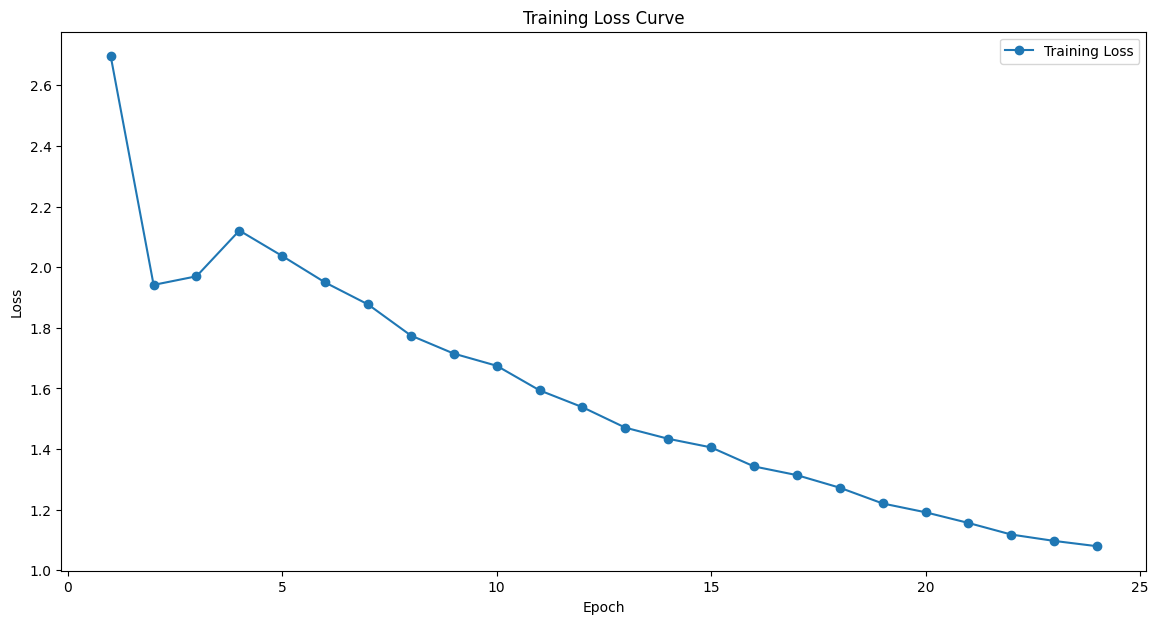

In [10]:
plt.figure(figsize=(14, 7))  # ywe can Adjust the width (114) and height (7) as needed to streach the plot from either axes

# Plot training and validation loss curves
plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Training Loss', marker='o')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')

# Add legend
plt.legend()

# Display plot
plt.show()


### validation loss curve per epoch

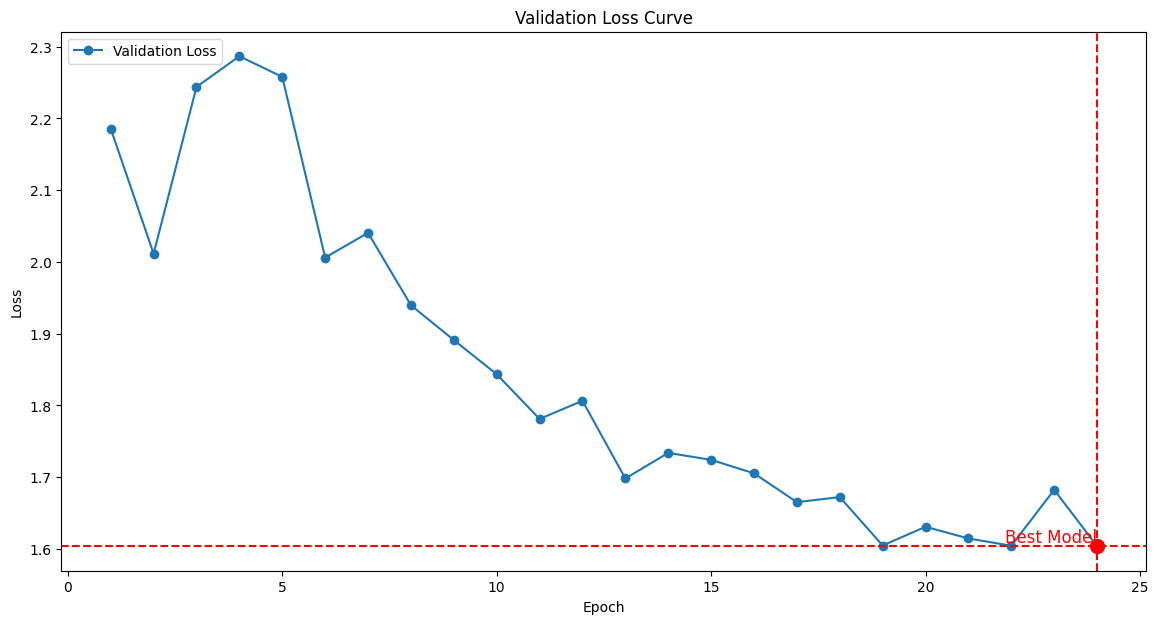

In [11]:
plt.figure(figsize=(14, 7)) 

# Plot validation loss curve
plt.plot(results_df['epoch'], results_df['val/cls_loss'], label='Validation Loss', marker='o')

# Find the index of the minimum validation loss
min_loss_index = results_df['val/cls_loss'].idxmin()

# Get the epoch corresponding to the minimum loss
min_loss_epoch = results_df.loc[min_loss_index, 'epoch']
min_loss_val = results_df.loc[min_loss_index, 'val/cls_loss']

# Add a text annotation for the best model
plt.text(min_loss_epoch, min_loss_val, 'Best Model', color='red', fontsize=12, ha='right', va='bottom')

# Add a marker at the minimum loss point
plt.plot(min_loss_epoch, min_loss_val, marker='o', markersize=10, color='red')

# Draw horizontal line
plt.axhline(y=min_loss_val, color='red', linestyle='--')

# Draw vertical line
plt.axvline(x=min_loss_epoch, color='red', linestyle='--')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Curve')

# Add legend
plt.legend()

# Show plot
plt.show()


### view model inferencing results on Training data

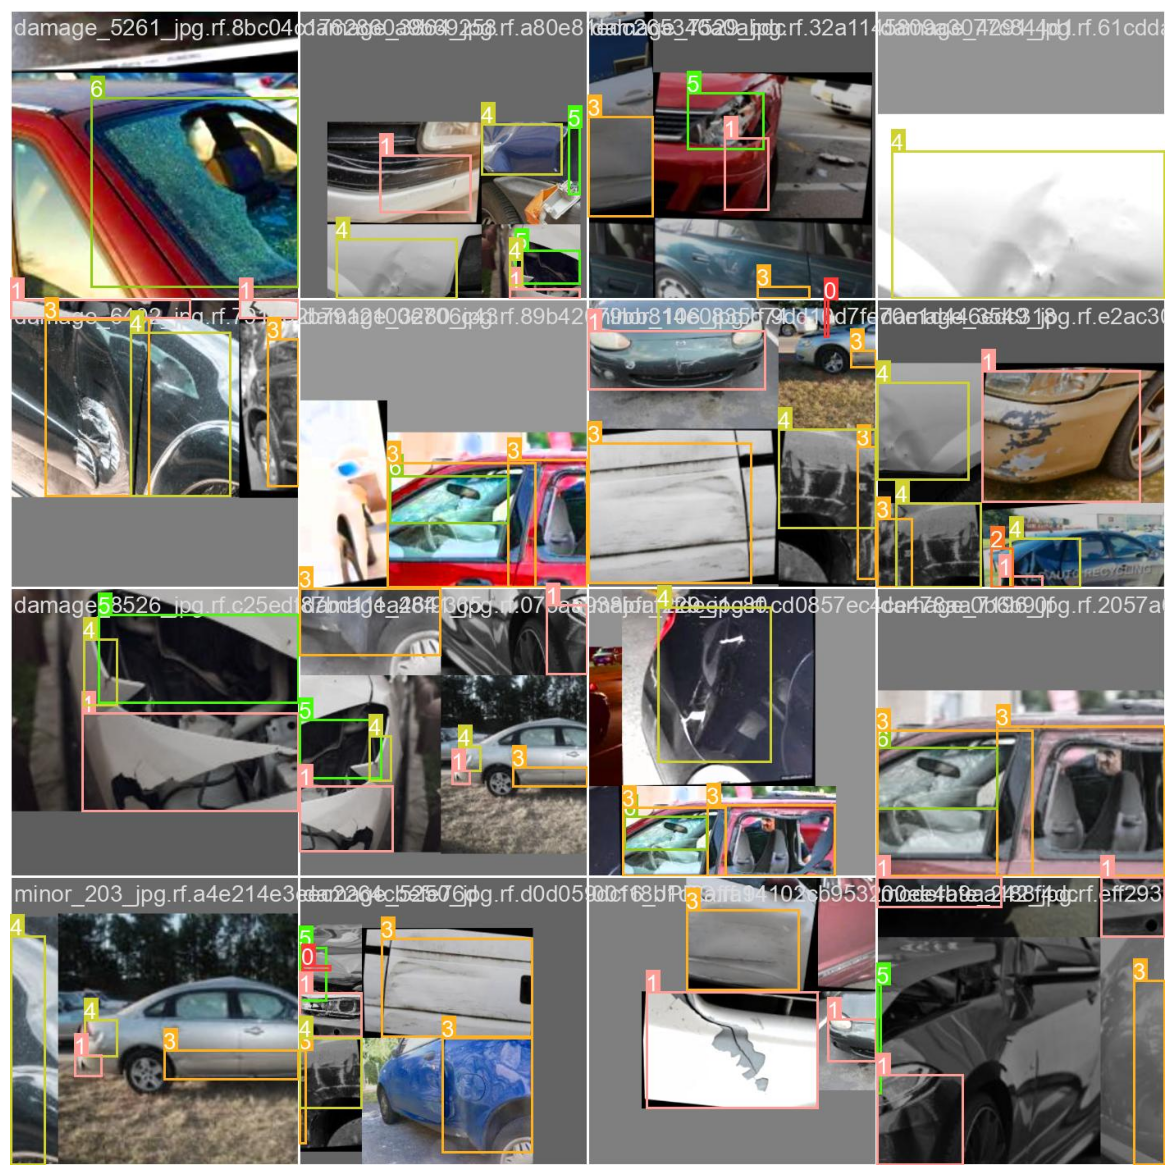

In [13]:
# Read the image file
img = mpimg.imread('results_detection/train/train_batch2.jpg')  # Replace 'path_to_your_image.jpg' with the actual path to your image file
# Set the size of the plot
plt.figure(figsize=(15, 15))  # Adjust the size as needed
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()
